In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
%matplotlib inline

In [6]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [7]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Q1. Visualize the univariate distribution of each continuous feature, and the distribution of the target

In [9]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')
df['SeniorCitizen'] = df['SeniorCitizen'].astype(str)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


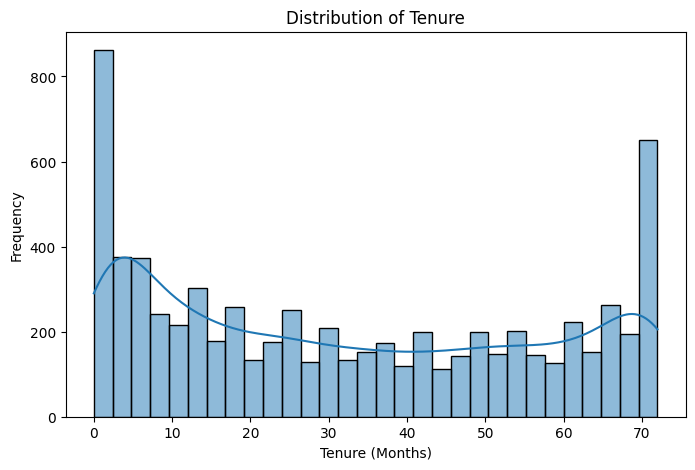

In [11]:
plt.figure(figsize=(8, 5))
sns.histplot(df["tenure"], bins=30, kde=True)
plt.title("Distribution of Tenure")
plt.xlabel("Tenure (Months)")
plt.ylabel("Frequency")
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


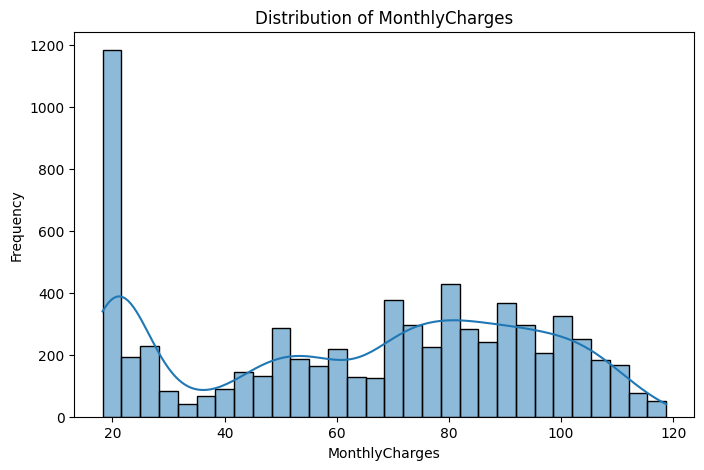

In [12]:
plt.figure(figsize=(8, 5))
sns.histplot(df["MonthlyCharges"], bins=30, kde=True)
plt.title("Distribution of MonthlyCharges")
plt.xlabel("MonthlyCharges")
plt.ylabel("Frequency")
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


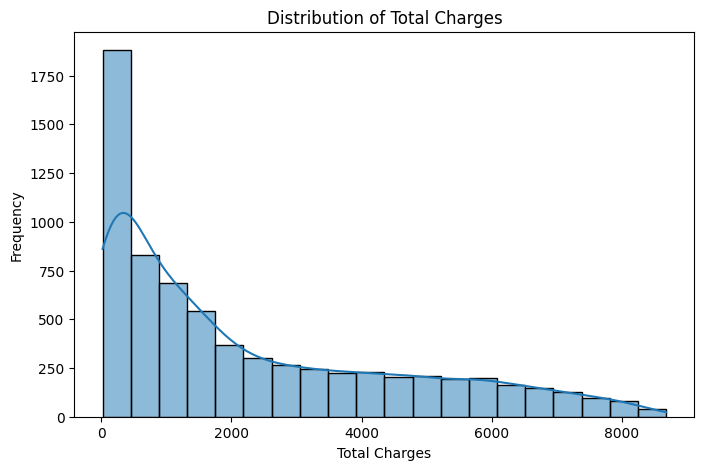

In [13]:
plt.figure(figsize=(8, 5))
sns.histplot(df["TotalCharges"],bins=20,kde=True)
plt.title("Distribution of Total Charges")
plt.xlabel("Total Charges")
plt.ylabel("Frequency")
plt.show()

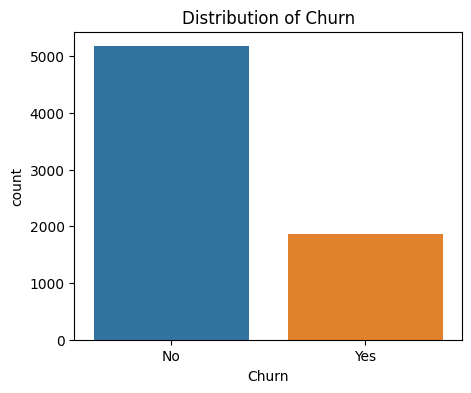

In [14]:
plt.figure(figsize=(5, 4))
sns.countplot(x=df["Churn"])
plt.title("Distribution of Churn")
plt.show()

### Q2)Split data into training (90%) and test set (10%) using random state = 0. Build a pipeline for dealing with categorical variables. Evaluate Logistic Regression, linear support vector machines and nearest neighbors using 5-fold cross-validation with their default parameters. How different are the results? How does scaling the continuous features with StandardScaler influence the results?

In [15]:
cat_list = ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']
num_list =['tenure', 'MonthlyCharges', 'TotalCharges']

df['y_encoded'] = df['Churn'].map({'Yes': 1, 'No': 0})  
y = df['y_encoded'].values.ravel()  
X = df.drop(columns=['Churn', 'customerID','y_encoded'])
freq=df['TotalCharges'].mode()
freq=freq[0]
X=X.fillna(freq)
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.1, random_state=0)

X_num_train=X_train[num_list]
X_num_test=X_test[num_list]

pipe_cat = make_pipeline(SimpleImputer(strategy='constant'), OneHotEncoder())
X_train_encoded=pipe_cat.fit_transform(X_train[cat_list])
X_test_encoded=pipe_cat.transform(X_test[cat_list])
pipe_cat2 = make_pipeline(SimpleImputer(strategy='constant'), OneHotEncoder())
X_encoded=pipe_cat2.fit_transform(X[cat_list])


In [16]:
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

import numpy as np
from scipy import sparse
from sklearn.model_selection import cross_val_score
X_train_unscaled = sparse.hstack((X_train_encoded,
                                sparse.csr_matrix(X_num_train))).toarray()
X_test_unscaled = sparse.hstack((X_test_encoded,
                               sparse.csr_matrix(X_num_test))).toarray()
X_full=sparse.hstack((X_encoded,
                                sparse.csr_matrix(X[num_list]))).toarray()

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler2=StandardScaler()
X_num_train_scaled=scaler.fit_transform(X_num_train)
X_num_test_scaled=scaler.transform(X_num_test)
X_num_scaled=scaler2.fit_transform(X[num_list])

X_train_scaled = sparse.hstack((X_train_encoded,
                                sparse.csr_matrix(X_num_train_scaled))).toarray()
X_test_scaled = sparse.hstack((X_test_encoded,
                               sparse.csr_matrix(X_num_test_scaled))).toarray()
X_full_scaled = sparse.hstack((X_encoded,
                               sparse.csr_matrix(X_num_scaled))).toarray()

In [17]:
logreg_unscaled=pd.DataFrame(cross_validate(LogisticRegression(solver='lbfgs'),X_full,y,cv=5,return_train_score=True))
clf1 = LogisticRegression(max_iter=int(1e6))
clf1.fit(X_train_unscaled, y_train)
logreg_unscaled_accuracy = clf1.score(X_test_unscaled, y_test)
print('Accuracy score on test set of the Unscaled {} is {:.3f}'.format(clf1.__class__.__name__, logreg_unscaled_accuracy))

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

Accuracy score on test set of the Unscaled LogisticRegression is 0.800


In [18]:
logreg_scaled=pd.DataFrame(cross_validate(LogisticRegression(solver='lbfgs'),X_full_scaled,y,cv=5,return_train_score=True))
clf2 = LogisticRegression(max_iter=int(1e+06))
clf2.fit(X_train_scaled, y_train)
logreg_scaled_accuracy = clf2.score(X_test_scaled, y_test)
print('Accuracy score on test set of the Scaled {} is {:.3f}'.format(clf2.__class__.__name__, logreg_scaled_accuracy))

a=logreg_unscaled.mean().to_frame(name='Unscaled')
b=logreg_scaled.mean().to_frame(name='Scaled')
logreg=pd.concat([a,b],axis=1)
print(logreg)

Accuracy score on test set of the Scaled LogisticRegression is 0.800
             Unscaled    Scaled
fit_time     1.674659  0.611794
score_time   0.000575  0.001434
test_score   0.803920  0.804346
train_score  0.807185  0.806297


- Unscaled Logistic Regression failed to converge, thus scaling helped to reduce time and resolve convergence problem (other comparisons might be irrelevant since it failed to converge)

In [32]:
clf3 = KNeighborsClassifier()
clf3.fit(X_train_unscaled, y_train)
knn_unscaled=pd.DataFrame(cross_validate(KNeighborsClassifier(),X_full,y,cv=5,return_train_score=True))
knn_unscaled_accuracy = clf3.score(X_test_unscaled, y_test)
print('Accuracy score on the test set of the Unscaled {} is {:.3f}'.format(clf3.__class__.__name__, knn_unscaled_accuracy))

clf4 = KNeighborsClassifier()
clf4.fit(X_train_scaled, y_train)
knn_scaled=pd.DataFrame(cross_validate(KNeighborsClassifier(),X_full_scaled,y,cv=5,return_train_score=True))
knn_scaled_accuracy = clf4.score(X_test_scaled, y_test)
print('Accuracy score on the test set  of the Scaled {} is {:.3f}'.format(clf4.__class__.__name__, knn_scaled_accuracy))

c=knn_unscaled.mean().to_frame(name='Unscaled')
d=knn_scaled.mean().to_frame(name='Scaled')
knn=pd.concat([c,d],axis=1)
print(knn)

Accuracy score on the test set of the Unscaled KNeighborsClassifier is 0.784
Accuracy score on the test set  of the Scaled KNeighborsClassifier is 0.755
             Unscaled  Scaled
fit_time        0.002   0.002
score_time      0.026   0.030
test_score      0.762   0.772
train_score     0.832   0.839


- From CV using 5 folds, we noticed a slight improvement in both train and test scores by using scaled data
- Fit times are comparable
- Generalization on test set decreased after scaling

In [47]:
svc_unscaled=pd.DataFrame(cross_validate(LinearSVC(),X_train_unscaled,y_train,cv=5,return_train_score=True))
clf5 = LinearSVC()
clf5.fit(X_train_unscaled, y_train)
svc_unscaled_accuracy = clf5.score(X_test_unscaled, y_test)
print('Accuracy score on the test set of the Unscaled {} is {:.3f}'.format(clf5.__class__.__name__, svc_unscaled_accuracy))

svc_scaled=pd.DataFrame(cross_validate(LinearSVC(),X_train_scaled,y_train,cv=5,return_train_score=True))
clf6 = LinearSVC()
clf6.fit(X_train_scaled, y_train)
svc_scaled_accuracy = clf6.score(X_test_scaled, y_test)
print('Accuracy score on the test set of the Scaled {} is {:.3f}'.format(clf6.__class__.__name__, svc_scaled_accuracy))

e=svc_unscaled.mean().to_frame(name='Unscaled')
f=svc_scaled.mean().to_frame(name='Scaled')
svc=pd.concat([e,f],axis=1)
print(svc)

Accuracy score on the test set of the Unscaled LinearSVC is 0.804
Accuracy score on the test set of the Scaled LinearSVC is 0.803
              Unscaled     Scaled
fit_time     1.811e-02  1.300e-02
score_time   9.247e-04  5.296e-04
test_score   8.006e-01  8.028e-01
train_score  8.042e-01  8.056e-01


- Scaling improved both test score and train score for linear SVC from 5-fold cross validation, however, the accuracy on predicting the test set decreased by 0.001 (negligible) from 80.4% for unscaled to 80.3% for scaled model.
- The fit time went down by almost half the unscaled model's time by using scaler.


## Q3. Tune the key parameters (C for Logistic Regression and linear support vector machines, and K for nearest neighbors) using GridSearchCV. Do the results improve?
Visualize the performance as function of the parameters for all three models

### Lin Reg

In [19]:
from sklearn.compose import make_column_transformer,ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, RobustScaler
pipe_cat = make_pipeline(SimpleImputer(strategy='constant'), OneHotEncoder(handle_unknown='ignore'))
pipe_num = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler())
preprocessor = make_column_transformer((pipe_cat, cat_list), (pipe_num, num_list))
pipe1 = make_pipeline(preprocessor, LogisticRegression(solver='saga',max_iter=5000))
pipe1.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'SeniorCitizen',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges'])])),
                ('logisticregression',
                 LogisticRegression(max_iter=5000, solver='saga'))])

In [20]:
param_grid = {'logisticregression__C': np.logspace(-3,0,7),
              'logisticregression__penalty':['l1','l2'],
             'columntransformer__pipeline-2__standardscaler':[MinMaxScaler(),StandardScaler(),RobustScaler()]}
#param_grid = {'logisticregression__C': np.logspace(-3,3,7),'logisticregression__penalty':['l1','l2']}
from sklearn.model_selection import StratifiedKFold
cv1 = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
grid1=GridSearchCV(pipe1, param_grid,cv=cv1, n_jobs=-1)
scores = pd.DataFrame(cross_validate(grid1, X, y, cv=cv1, return_train_score=True))


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/opt/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/backend/popen_loky_posix.py", line 180, in <module>
    exitcode = process_obj._bootstrap()
  File "/opt/anaconda3/lib/python3.11/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/opt/anaconda3/lib/python3.11/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/anaconda

In [21]:
grid1.fit(X_train,y_train)
grid1.best_params_

{'columntransformer__pipeline-2__standardscaler': StandardScaler(),
 'logisticregression__C': np.float64(1.0),
 'logisticregression__penalty': 'l2'}

In [22]:
grid1_df=pd.DataFrame(grid1.cv_results_)
grid1_df['mean_test_score'].max()

np.float64(0.8038794788354717)

In [23]:
pred1=grid1.predict(X_test)
accuracy_score(y_test,pred1)

0.8014184397163121

<Axes: xlabel='param_logisticregression__penalty', ylabel='param_logisticregression__C'>

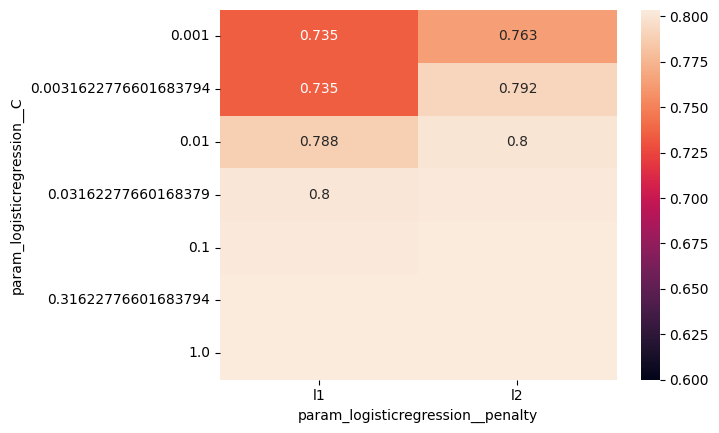

In [24]:
res = pd.pivot_table(pd.DataFrame(grid1.cv_results_), values='mean_test_score', index='param_logisticregression__C', columns='param_logisticregression__penalty')
pd.set_option("display.precision",3)
sns.heatmap(res, annot=True, fmt=".3g", vmin=0.6)

In [25]:
print('Model tuned\n',scores.mean())
print('Model not tuned:\n',logreg['Scaled'])
print('Accuracy of tuned Logistic model: {}, Accuracy of default Logistic model:{}'.format(accuracy_score(y_test,pred1),logreg_scaled_accuracy))

Model tuned
 fit_time       13.414
score_time      0.010
test_score      0.802
train_score     0.807
dtype: float64
Model not tuned:
 fit_time       0.612
score_time     0.001
test_score     0.804
train_score    0.806
Name: Scaled, dtype: float64
Accuracy of tuned Logistic model: 0.8014184397163121, Accuracy of default Logistic model:0.8


- Tuning model slightly improved train_score but it narrowed the gap between test and train score by lowering the test score (which is not always a bad sign)
- Accuracy on test set prediction also went up marginally

### KNN

In [26]:
pipe2 = make_pipeline(preprocessor, KNeighborsClassifier())

In [27]:
param_grid = {'columntransformer__pipeline-2__simpleimputer__strategy': ['mean', 'median','most_frequent'],
              'kneighborsclassifier__n_neighbors': list(np.arange(9,31,2)),'columntransformer__pipeline-2__standardscaler':[MinMaxScaler(),StandardScaler(),RobustScaler()]}
grid2=GridSearchCV(pipe2, param_grid,cv=cv1, n_jobs=-1)
scores2 = pd.DataFrame(cross_validate(grid2, X, y, cv=cv1, n_jobs=-1, return_train_score=True))

In [28]:
grid2.fit(X_train,y_train)
grid2.best_params_

{'columntransformer__pipeline-2__simpleimputer__strategy': 'mean',
 'columntransformer__pipeline-2__standardscaler': StandardScaler(),
 'kneighborsclassifier__n_neighbors': np.int64(27)}

In [29]:
pred2=grid2.predict(X_test)
accuracy_score(y_test,pred2)

0.7872340425531915

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


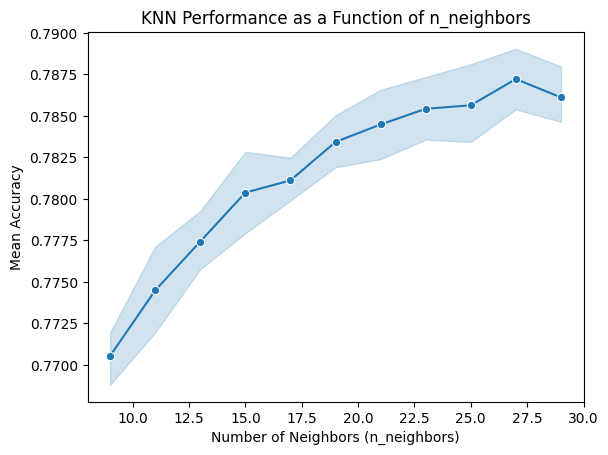

In [50]:
res2 = pd.DataFrame(grid2.cv_results_)
sns.lineplot(x=res2["param_kneighborsclassifier__n_neighbors"], y=res2["mean_test_score"], marker="o")
plt.xlabel("Number of Neighbors (n_neighbors)")
plt.ylabel("Mean Accuracy")
plt.title("KNN Performance as a Function of n_neighbors")
plt.show()

In [51]:
print('Model tuned:\n',scores2.mean())
print('Model not tuned:\n',knn['Scaled'])
print('Accuracy of tuned KNN model: {}, Accuracy of default KNN model:{}'.format(accuracy_score(y_test,pred2),knn_scaled_accuracy))

Model tuned:
 fit_time       108.052
score_time       0.262
test_score       0.792
train_score      0.808
dtype: float64
Model not tuned:
 fit_time       0.002
score_time     0.030
test_score     0.772
train_score    0.839
Name: Scaled, dtype: float64
Accuracy of tuned KNN model: 0.7872340425531915, Accuracy of default KNN model:0.7546099290780142


- Tuning KNN model lower the train score but it also narrowed down the train-test score gap, which might suggest more reliable generalization
- Predicting accuracy also went up by about 3%

### SVC

In [35]:
pipe3 = make_pipeline(preprocessor, LinearSVC())

In [52]:
param_grid = {'linearsvc__C': np.logspace(-3,0,7),
              'columntransformer__pipeline-2__standardscaler':[MinMaxScaler(),StandardScaler(),RobustScaler()],
             'linearsvc__penalty':['l1','l2'],
             'linearsvc__dual': [False]}
grid3=GridSearchCV(pipe3, param_grid,cv=cv1, n_jobs=-1)
scores3 = pd.DataFrame(cross_validate(grid3, X, y, cv=cv1, n_jobs=-1, return_train_score=True))

/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the n

In [54]:
grid3.fit(X_train,y_train)
grid3.best_params_

/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the n

{'columntransformer__pipeline-2__standardscaler': MinMaxScaler(),
 'linearsvc__C': np.float64(0.03162277660168379),
 'linearsvc__dual': False,
 'linearsvc__penalty': 'l1'}

In [55]:
pred3=grid3.predict(X_test)
accuracy_score(y_test,pred3)

0.8028368794326242

<Axes: xlabel='param_linearsvc__penalty', ylabel='param_linearsvc__C'>

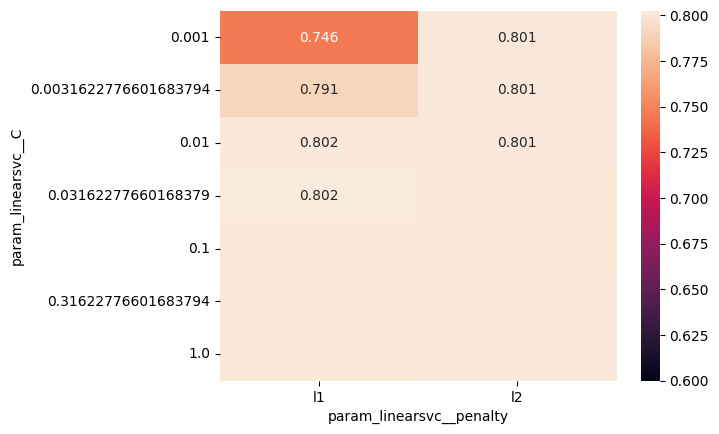

In [56]:
res2 = pd.pivot_table(pd.DataFrame(grid3.cv_results_), values='mean_test_score', index='param_linearsvc__C', columns='param_linearsvc__penalty')
pd.set_option("display.precision",3)
sns.heatmap(res2, annot=True, fmt=".3g", vmin=0.6)

In [58]:
print('Model tuned:\n',scores3.mean())
print('Model not tuned:\n',svc['Scaled'])
print('Accuracy of tuned Linear SVC model: {}, Accuracy of default Linear SVC model:{}'.format(accuracy_score(y_test,pred3),svc_scaled_accuracy))


Model tuned:
 fit_time       70.444
score_time      0.021
test_score      0.801
train_score     0.806
dtype: float64
Model not tuned:
 fit_time       1.300e-02
score_time     5.296e-04
test_score     8.028e-01
train_score    8.056e-01
Name: Scaled, dtype: float64
Accuracy of tuned Linear SVC model: 0.8028368794326242, Accuracy of default Linear SVC model:0.8028368794326242


- Tuning SVC model also decreased train-score gap from 5-fold CV
- The predicting power was the same when applied to test set